# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2025-11-03 20:29:35.688758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762198175.860261    4616 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762198175.903755    4616 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


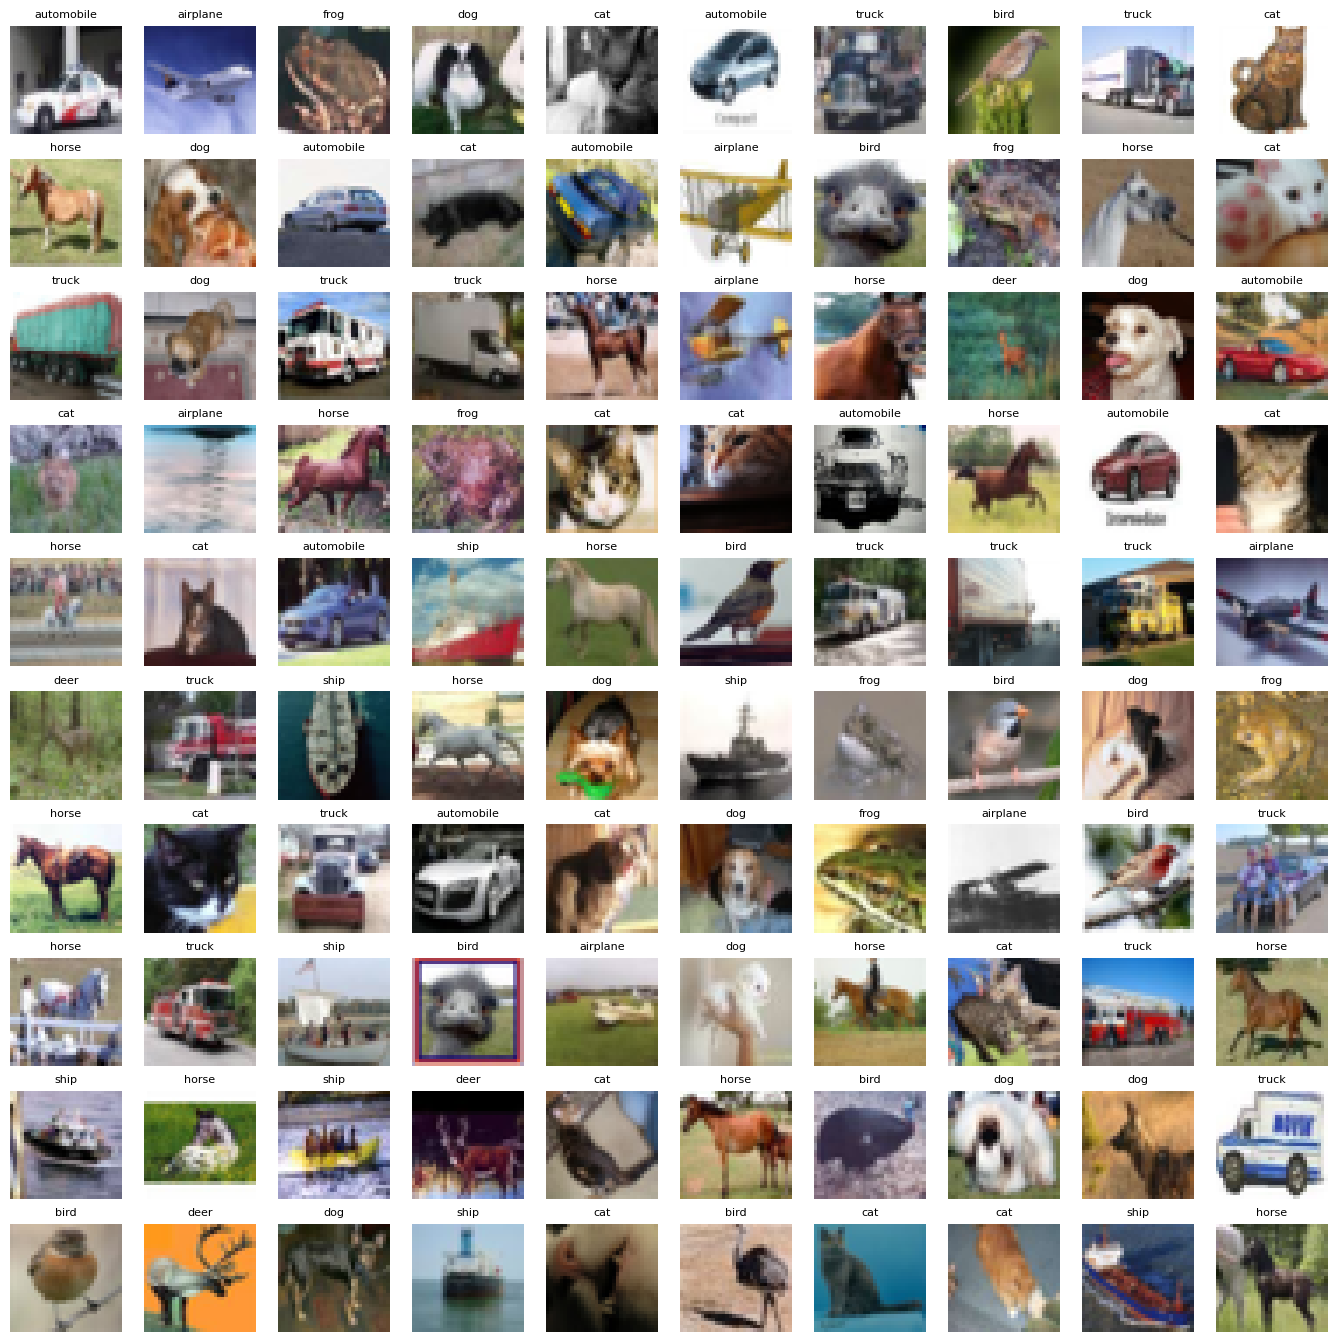

In [2]:
# Visualize the images (10x10(random samples))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
w_grid = 10
l_grid = 10
fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))
axes = axes.ravel() 
n_train = len(x_train)
for i in np.arange(0, w_grid * l_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = y_train[index, 0]
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')

In [3]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

In [4]:
# Normalize the images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model()
model.summary()

/home/kep1n/.pyenv/versions/ironhack/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762198206.812679    4616 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3955 MB memory:  -> device: 0, name: Quadro P2200, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=512, epochs=50)

Epoch 1/50


I0000 00:00:1762198225.485883    4811 service.cc:148] XLA service 0x7f6c480473f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762198225.485960    4811 service.cc:156]   StreamExecutor device (0): Quadro P2200, Compute Capability 6.1
2025-11-03 20:30:25.564312: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762198225.662219    4811 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-11-03 20:30:26.585023: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[512,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNo

 9/98 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1026 - loss: 2.3141

I0000 00:00:1762198227.889267    4811 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1531 - loss: 2.2754

2025-11-03 20:30:29.712557: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[336,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[336,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.1857 - loss: 2.2433
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2538 - loss: 2.1235
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2894 - loss: 2.0250
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3222 - loss: 1.9531
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3397 - loss: 1.9004
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3527 - loss: 1.8638
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3652 - loss: 1.8306
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3742 - loss: 1.8057
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3825 - loss: 1.7825
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3908 - loss: 1.7563
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3953 - loss: 1.7351
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4049 - l

*   Plot the cross entropy loss curve and the accuracy curve

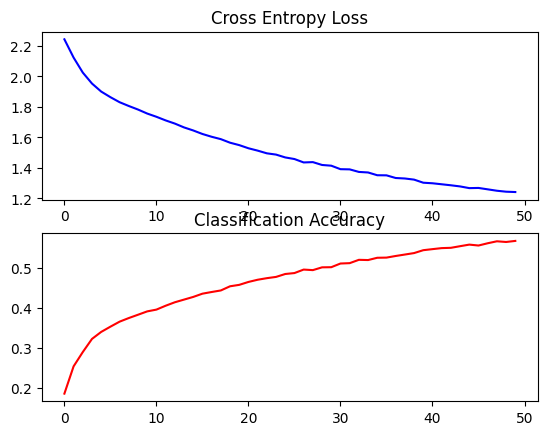

In [8]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='red', label='train')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 933,162 (3.56 MB)

 Trainable params: 933,162 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [24]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=512, epochs=50)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6310 - loss: 1.0659

2025-11-03 20:49:23.333191: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[512,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-11-03 20:49:23.374926: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[512,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[512,32,30,30]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_c

98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.6296 - loss: 1.0684 - val_accuracy: 0.5897 - val_loss: 1.1578
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6345 - loss: 1.0573 - val_accuracy: 0.5882 - val_loss: 1.1698
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6375 - loss: 1.0490 - val_accuracy: 0.5970 - val_loss: 1.1444
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6389 - loss: 1.0413 - val_accuracy: 0.5984 - val_loss: 1.1405
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6429 - loss: 1.0279 - val_accuracy: 0.5977 - val_loss: 1.1552
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6450 - loss: 1.0274 - val_accuracy: 0.5796 - val_loss: 1.1842
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6491 - loss: 1.0168 - val_accuracy: 0.6072 - val_loss: 1.1278
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6493 - loss: 1.0104 - val_accuracy: 0.5896 - val_loss: 1.

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

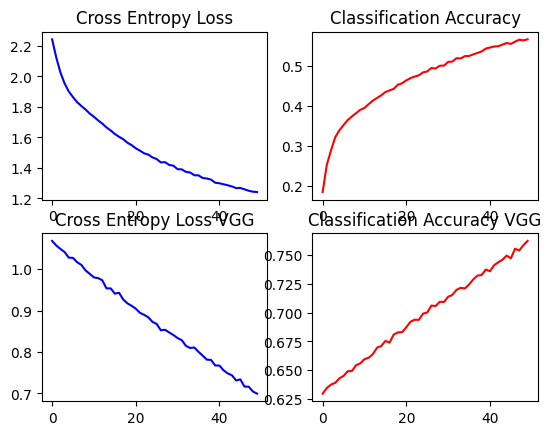

In [25]:
plt.subplot(221)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')

# plot accuracy
plt.subplot(222)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='red', label='train')

plt.subplot(223)
plt.title('Cross Entropy Loss VGG')
plt.plot(history_vgg.history['loss'], color='blue', label='train')

plt.subplot(224)
plt.title('Classification Accuracy VGG')
plt.plot(history_vgg.history['accuracy'], color='red', label='train')
plt.show()

**Comment on the observation**

The second model seems to perform better. It still has room to improve with more epochs because it's not Platteuing yet.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000, 10)


<Axes: >

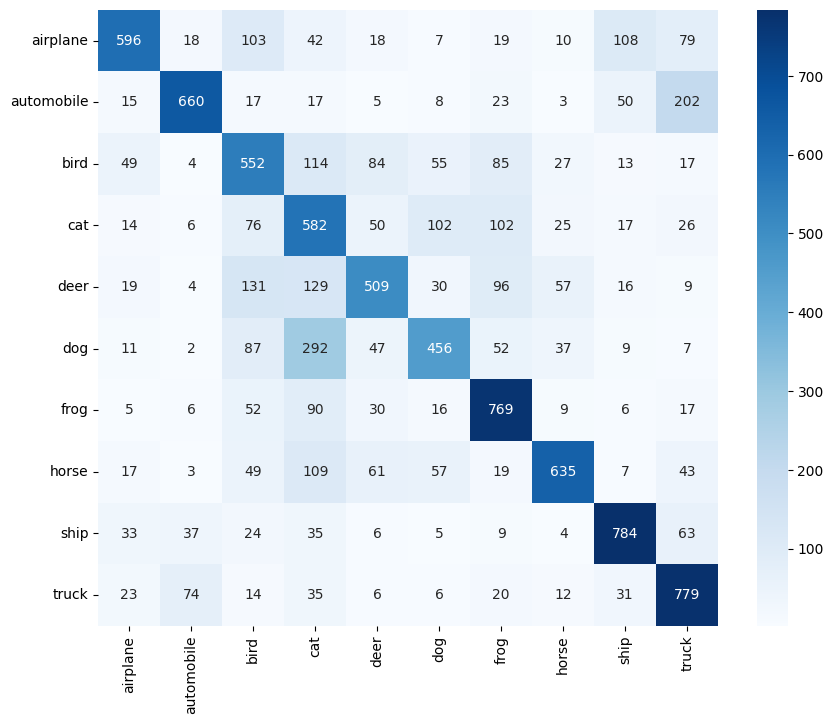

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(x_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis=1)
gt = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(gt, predictions)
# sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names)

**Comment here :**

There are some inconsistencies between from and deer, dat and bird. But the model is far from the optimal curve, so I guess it's not that bad for a simple model.

...

*    Print the test accuracy for the trained model.

In [27]:
history_vgg.history['val_accuracy']

[0.5896999835968018,
 0.5881999731063843,
 0.597000002861023,
 0.5983999967575073,
 0.5976999998092651,
 0.5795999765396118,
 0.607200026512146,
 0.5896000266075134,
 0.6029000282287598,
 0.607200026512146,
 0.5989000201225281,
 0.6079000234603882,
 0.5974000096321106,
 0.6158999800682068,
 0.6154999732971191,
 0.6067000031471252,
 0.6134999990463257,
 0.6190000176429749,
 0.6194999814033508,
 0.6093999743461609,
 0.6155999898910522,
 0.6140999794006348,
 0.628000020980835,
 0.6205999851226807,
 0.6173999905586243,
 0.621999979019165,
 0.6079999804496765,
 0.6197999715805054,
 0.6097999811172485,
 0.6238999962806702,
 0.6140999794006348,
 0.6200000047683716,
 0.6216999888420105,
 0.6150000095367432,
 0.6327000260353088,
 0.6265000104904175,
 0.6190000176429749,
 0.6244000196456909,
 0.6263999938964844,
 0.6229000091552734,
 0.629800021648407,
 0.6122000217437744,
 0.6277999877929688,
 0.6220999956130981,
 0.6226000189781189,
 0.6402000188827515,
 0.6402999758720398,
 0.6391000151634216

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model()
model.summary()

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [28]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=512, epochs=10)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.7636 - loss: 0.6924 - val_accuracy: 0.6221 - val_loss: 1.1117
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7656 - loss: 0.6893 - val_accuracy: 0.6178 - val_loss: 1.1384
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7695 - loss: 0.6781 - val_accuracy: 0.6168 - val_loss: 1.1911
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7664 - loss: 0.6828 - val_accuracy: 0.6311 - val_loss: 1.1166
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7745 - loss: 0.6639 - val_accuracy: 0.6134 - val_loss: 1.1775
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7712 - loss: 0.6665 - val_accuracy: 0.6339 - val_loss: 1.0904
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7764 - loss: 0.6561 - val_accuracy: 0.6284 - val_loss: 1.1178
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7820 - loss: 0.6437 - val_accuracy: 0.6302 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000, 10)


<Axes: >

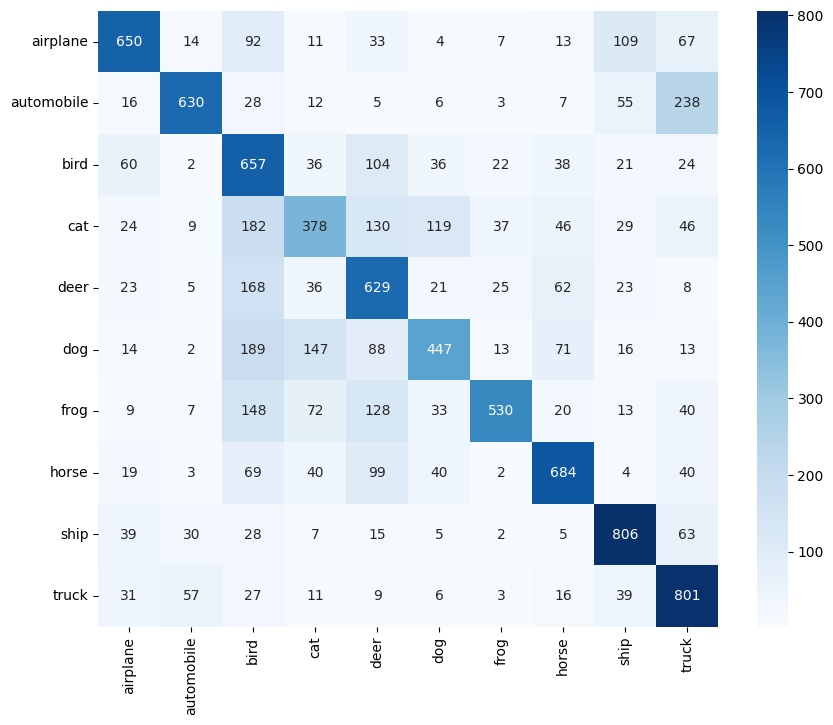

In [29]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis=1)
gt = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(gt, predictions)
# sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into the neural network allowing to learn non-linear mappings and patterns
_

2 - Key Differences between sigmoid and softmax:

In the Sigmoid function_the output sum is independent for each neuron while in softmax the sum of all neurons equals one.

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical crossentropy is used when there are more than 2 output classes (Cat vs. Dog vs. Horse vs. ..). Binary expects 2 classes (Dog vs. Not-Dog)

_
